# Week 5: Machine Learning 2

There are myriad machine learning models (and algorithms for fitting them to data) out there, and each one has something special about it that makes it suitable to a specific type of problem. To apply machine learning and get some initial results is fairly straight forward. Getting under the hood, however, requires a bit of work. This week we focus on how Decision Trees work. In the exercises today you will:

* Implement a standard decision tree mechanism
* Play around with a neural network

## Exercises

**Before you do anything else**:

Load the `pandas.DataFrame` containing team alliances for each character that you created last week, e.g. into a variable called `data_teams`. You will use this in the exercises below. I refer to this data specifically when I mention the "data".

*Note:* We are working with all three factions again

In [48]:
import pandas as pd
df = pd.read_csv('../outputs/marvel_characters.csv')
df

,Unnamed: 0,#Fearsome Four,1991 in comics,2013 in comics,A-Force,A-Next,A.I. Army,A.R.M.O.R.,Acolytes (comics),Action Pack (comics),...,Xavier Institute student body,Xavier's Security Enforcers,Yakuza,Young Allies,Young Allies (Marvel Comics),Young Avengers,Young Masters,Young X-Men,Zodiac (comics),faction
0,Abner Jenkins,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
1,Abomination (character),0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,Abraham Cornelius,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Absorbing Man,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Adam Warlock,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692,Yellowjacket (Marvel Comics),0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
693,Yo-Yo Rodriguez,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
694,Zeke Stane,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
695,Zheng Zu,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Part 1: Decision trees

In part 1 you will implement the decision making algorithm of a decision tree classifier, step by step.

>**Ex. 5.1.1**: Read about [Shannon entropy](https://en.wikipedia.org/wiki/Entropy_(information_theory)).
1. What is it? How is it defined mathematically (write out the formula in LateX formatting)?
2. Write a function that computes the Shannon-entropy of a probability vector. Compute the Shannon entropy of `p=[0.2, 0.3, 0.5]`.

5.1.1.1: Shannon entropy is the average amount of information contained in knowing the state of a point in a dataset. Shannon entropy is defined mathematically as $$H(X) = - \sum_{x \in \Omega} p(x)\log p(x)$$
where $X$ is a discrete random variable distributed across $p: \Omega \rightarrow [0, 1]$

In [49]:
import math
def shannon(prob_vec):
    return -sum(0 if prob == 0 else prob * math.log(prob, 2) for prob in prob_vec)

shannon([0.2, 0.3, 0.5])

1.4854752972273344

>**Ex. 5.1.2**: Split your data (`data_teams`) into two subsets. One where characters are affiliated with X-men and one where they are not.
1. What is the entropy of target labels in each subset?
2. What is the weighted average entropy of the split?
3. Write a function that computes the weighted average entropy of a split, given the data and team (name or id) on which to split the data. Show that it gives you the same split entropy that you obtained in point 2.
4. Plot the distribution of split entropy for all features. Comment on the result. My figure looks [like this](https://dhsvendsen.github.io/images/BD_5_1_2_4.png).

In [50]:
# 5.1.2.1
xman = df.loc[(df['X-Men'] == 1)]
non_xman = df.loc[(df['X-Men'] != 1)]
# get the proportion of each faction in the xman dataframe
xman_prob_vec = [len(xman.loc[(xman['faction'] == faction)]) / len(xman) for faction in range(0, 3)]
non_xman_prob_vec = [len(non_xman.loc[(non_xman['faction'] == faction)]) / len(non_xman) for faction in range(0, 3)]
f'The X-Men have a shannon entropy of {shannon(xman_prob_vec)} and the non-X-Men have a shannon_entropy of {shannon(non_xman_prob_vec)}'

'The X-Men have a shannon entropy of 1.2189514568588302 and the non-X-Men have a shannon_entropy of 1.4113733977368847'

In [51]:
# 5.1.2.2
weighted_average_across_xman_split = ((shannon(xman_prob_vec) * len(xman)) + (shannon(non_xman_prob_vec) * len(non_xman))) / (len(xman) + len(non_xman))
weighted_average_across_xman_split

1.4025391048988678

In [52]:
# 5.1.2.3
def avg_weighted_shannon_across_split(df, split, entropy_feature, possible_entropy_feature_values):
    a = df.loc[(df[split] == 1)]
    b = df.loc[(df[split] != 1)]
    if (len(a) == 0 or len(b) == 0):
        print(split)
    a_vec = [len(a.loc[(a[entropy_feature] == feat)]) / len(a) for feat in possible_entropy_feature_values]
    b_vec = [len(b.loc[(b[entropy_feature] == feat)]) / len(b) for feat in possible_entropy_feature_values]
    try:
        return ((shannon(a_vec) * len(a)) + (shannon(b_vec) * len(b))) / (len(a) + len(b))
    except:
        print(f'{a_vec} {b_vec} {split}')

avg_weighted_shannon_across_split(df, 'X-Men', 'faction', range(0, 3))

1.4025391048988678

(array([  2.,   1.,   1.,   1.,   2.,   6.,   8.,  24.,  80., 309.]),
 array([1.37670094, 1.38147561, 1.38625027, 1.39102493, 1.3957996 ,
        1.40057426, 1.40534893, 1.41012359, 1.41489826, 1.41967292,
        1.42444758]),
 <BarContainer object of 10 artists>)

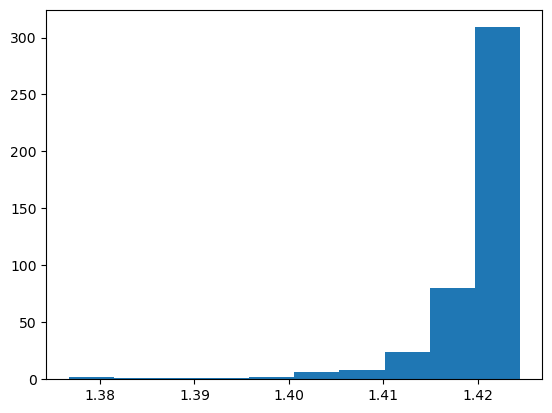

In [46]:
# 5.1.2.4
from matplotlib import pyplot as plt
split_entropies = [avg_weighted_shannon_across_split(df, col, 'faction', range(0, 3)) for col in df.columns.values[1:-1]]
plt.hist(split_entropies)

>**Ex. 5.1.EXTRA**: Print the maximum entropy path of a decision tree. Before you start, make a copy of `data_teams` called `data`.
>
>1. Implement the following pseudocode and print the output:<br><br>
>Step 1. Find `team` that gives lowest split entropy for `data`. Print `team`.<br>
>Step 2. Split `data` on `team`, to produce `data0` and `data1`. Print the entropy of each, as well as the weighted avg. entropy.<br>
>Step 3. Overwrite the `data` variable with either `data0` or `data1`, depending on which has the highest entropy.<br>
>Step 4. Stop if there are less than 5 datapoints in `data`. Otherwise start over from 1.<br><br>
>My output looks [like this](https://dhsvendsen.github.io/images/BD_5_1_1.png) for the first five splits.<br><br>
>
>2. Comment on decision path your code takes: How many splits are there? Do you notice anything interesting about the final splits?
>3. Train a `sklearn.tree.DecisionTreeClassifier` classifier on the dataset. Initiate the classifier with `criterion='entropy'`. What are the most important features of this classifier? How does this line up with the order of splits you just printed (a comment is fine)?
>
> **Will not be included in the assignment. Worth up to 10 extra credit.**

### Part 2: Logistic regression

Logistic regressions are great baseline models for comparing how well a more complicated model works.
They are literally just linear regressions where the output is *squeezed* through a `sigmoid` function,
so the returned value is between 0 and 1 (which can be interpreted as a probability if one so desired).

>**Ex. 5.2.1**: Implement a logistic regression model.
Below I have implemented a *linear* regression model which takes *two* input parameter.
Create another function, `logistic_regression` that takes again two input
variables and returns a value between 0 and 1. Demonstrate that it works by inputting
the data, `x=[1, 1]`, and parameters, `w0=1`, `w1=1` and `w2=0`, below, and show that it gives 0.88.
>
>*Hint*: The `sigmoid` function can look like this:
>
>        def sigmoid(x):
>            return 1 / (1 + np.exp(-x))

In [59]:
import numpy as np
def linear_regression(x, w0, w1, w2):
    return x[:,0]*w0 + x[:,1]*w1 + w2

def logistic_regression(x, w0, w1, w2):
    lin_reg = linear_regression(x, w0, w1, w2)
    return 1 / (1 + np.exp(-lin_reg))

# example
x = np.array([[1, 1]])
w0 = 1; w1 = 1; w2 = 0
logistic_regression(x, w0, w1, w2)

array([0.88079708])

> The function below generates some 2d data with labels. Show that the current parameter values (`w0 = -1; w1 = 2; w2 = -2`) of the `logistic_regression` function you wrote are not optimal by plotting `x[:, 0]` vs. `x[:, 1]` and colouring the points according to their predicted output-values (y's). I.e. setting `c=predictions` in the scatterplot. My figure looks like [this](https://dhsvendsen.github.io/images/BD_5_2_2_a.png).

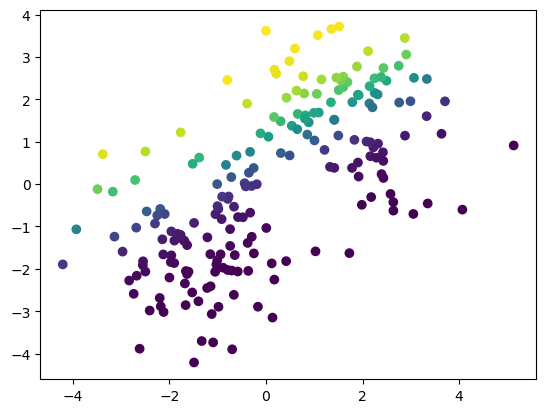

In [78]:
from scipy.optimize import curve_fit
import numpy as np

def generate_X_linear(N=200):
    """A little function that creates some data."""
    x = np.vstack([
        np.random.normal([-1.5, -1.5], 1, size=(int(N/2), 2)),
        np.random.normal([1.5, 1.5], 1, size=(int(N/2), 2))
    ])

    y = np.array([0] * int(N/2) + [1] * int(N/2))
    
    return x, y

# Generate input and output data
x, y = generate_X_linear()
w0 = -1; w1 = 2; w2 = -2
predictions = logistic_regression(x, w0, w1, w2)
fig = plt.scatter(x[:, 0], x[:, 1], c= predictions)

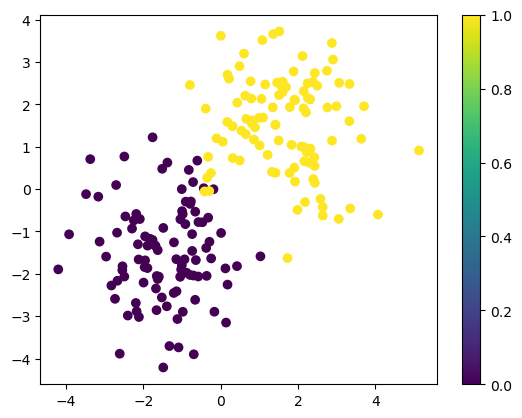

In [79]:
import matplotlib.pyplot as plt

# Plot and color by actual class-label
plt.scatter(x[:,0], x[:,1], c=y)
plt.colorbar();

>**Ex. 5.2.2**: *Fit* a logistic regression! You can use the `scipy` module `scipy.optimize.curve_fit`
to fit a model to some data (i.e. find the best parameter values `w`). 
> Fit the `logistic_regression` to the data `x` (input) and `y` (target).
> Again, plot and color the points according to their prediction. My figure looks like [this](https://dhsvendsen.github.io/images/BD_5_2_2_b.png). Comment on the figure and on the shape of the decision boundary.

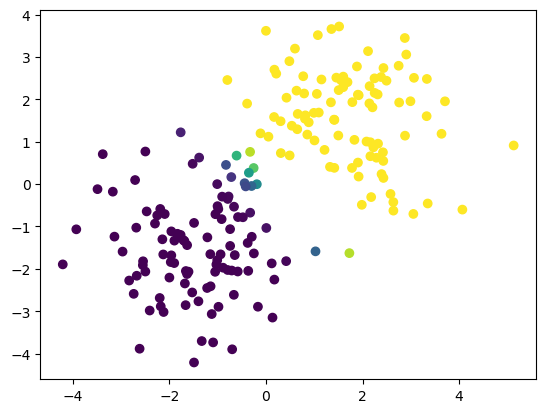

In [80]:
params = curve_fit(logistic_regression, x, y)[0]
predictions = logistic_regression(x, params[0], params[1], params[2])
fig = plt.scatter(x[:, 0], x[:, 1], c=predictions)

### Part 3 (extra): Neural networks

These days, neural networks are probably the hottest item in machine learning, and for good reason. Neural networks *can* be a bit of a mouthful to understand, and since I didn't talk about them in this course much (if at all), you can solve this problem if you have sufficient interest for it. That said, it is a skill well worth investing in.

We will be using the deep learning library **PyTorch** to build some neural networks with which we can play around with. *Nerdnote: Why not something more high-level such as Keras with a Tensorflow backend? Well PyTorch is easier to install. And using it, it's clearer what actually happens when you fit a neural network. Finally, for those taking the ANN course it's good to see something new.*

To get torch running you need to first install it. It's should be fairly straight forward, but depending on
your machine you may have to run different commands to install it. Check out the installation guide [here](https://pytorch.org/).

Once you've installed it you should be able to go:

In [ ]:
import torch

No errors? Great! Then let's make a small neural network that we know all to well at this point, and see if we can classify points with it. First, we generate some data.

In [ ]:
def generate_X_nonlinear(N=200, R=5):

    X_inner = torch.randn(int(N/2), 2)

    X_outer = torch.tensor([
        [R*np.cos(theta), R*np.sin(theta)]
        for theta in np.linspace(0, 2 * np.pi, int(N/2))
    ]) + torch.randn(int(N/2), 2)

    X = torch.cat([X_inner, X_outer], dim=0)
   
    y = torch.cat([
        torch.zeros(int(N/2)).reshape(-1, 1),
        torch.ones(int(N/2)).reshape(-1, 1)
    ])
    
    return X, y

# Number of training datapoints
N = 500

# Generate the data (note that code is using torch arrays now)
x, y = generate_X_nonlinear(N)

Using this data, we can now set up a neural network and train it. We are not going to do anything fancy here, just make a simple 2-layer feed forward neural network with 2 input neurons, 3 hidden neurons and 1 output neuron.

In [ ]:
# The layers and their number of neurons
sizes = [2, 3, 1]

We then need to define the model. PyTorch has an API called `Sequential` that makes this pretty easy. Try to get an idea of what the below code is doing.

In [ ]:
model = torch.nn.Sequential(
    torch.nn.Linear(sizes[0], sizes[1]),
    torch.nn.Sigmoid(),
    torch.nn.Linear(sizes[1], sizes[2]),
    torch.nn.Sigmoid()
)

Finally we need to define a loss function. We are just going to use the sum of squared errors, and again PyTorch has got an implementation we can pick right off the shelf.

In [ ]:
loss_fn = torch.nn.MSELoss(reduction='sum')

And then we can just train it! We pick a learning rate parameter (which is how big the steps we take during
gradient descent are), define an *optimizer* which is a wrapper for training that abstracts away all the
usual steps. The `epochs` are simply the number of times we train on the entire dataset. Then we are ready to
train!

In [ ]:
# Hyper-parameters
learning_rate = 1e-1
epochs = 100
mini_batch_size = 100

# Optimization wrapper
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Train
for t in range(epochs):
    
    # Randomly permute the row indices to get something like:
    # tensor([16214, 18491, 16308,  ..., 19629, 17565, 24696])
    permutation = torch.randperm(x.size()[0])
    
    # Start looping over the mini-batches! Each index `k` is
    # `mini_batch_size` values apart.
    for k in np.arange(0, x.size()[0], mini_batch_size):
        
        # Extract mini-batch data. The rest is the same
        mini_batch_indices = permutation[k:k+mini_batch_size]
        x_ = x[mini_batch_indices, :]
        y_ = y[mini_batch_indices, :]
        
        # Forward pass
        y_pred = model(x_)

        # Compute loss
        loss = loss_fn(y_pred, y_)

        # Before the backward pass, use the optimizer object to zero all of the
        # gradients for the variables it will update (which are the learnable
        # weights of the model). This is because by default, gradients are
        # accumulated in buffers (i.e, not overwritten) whenever .backward()
        # is called. Checkout docs of torch.autograd.backward for more details.
        optimizer.zero_grad()

        # Backward pass
        loss.backward()

        # Calling the step function on an Optimizer makes an update to its
        # parameters
        optimizer.step()
        
        
    # Print progress (here evaluating on all the data so we can compare)
    if t % 10 == 0:
        loss = loss_fn(model(x), y)
        print(t, "train:", loss.item())

Note that the errors we are showing here are the sum of squared errors. You'd have to jump through a small hoop (which is very doable) to get the accuracy. Also, this is the error on the training data. So there's no guarantee that we don't overfit here.

And now we can visualize the predictions next to the true labels!

In [ ]:
%matplotlib inline
from scipy.interpolate import interp1d
import matplotlib.pylab as plt

class cmap_in_range:
    """Create map to range of colors inside given domain.

    Example
    -------
    >>> cmap = cmap_in_range([0, 1])
    >>> cmap(0.1)
    (0.30392156862745101, 0.30315267411304353, 0.98816547208125938, 1.0)
    """
    def __init__(self, cmap_domain, cmap_range=[0, 1], cmap_style='rainbow'):
        self.cmap_domain = cmap_domain
        self.cmap_range = cmap_range
        self.m = interp1d(cmap_domain, cmap_range)
        self.cmap = plt.get_cmap(cmap_style)
        
    def __call__(self, value):
        if not self.cmap_domain[0] <= value <= self.cmap_domain[1]:
            raise Exception("Value must be inside cmap_domain.")
        return self.cmap(self.m(value))

In [ ]:
cmap = cmap_in_range([0, 1])

y_true = y.reshape(-1).numpy()
y_pred = model(x).data.numpy().reshape(-1)

plt.figure(figsize=(9, 3))

plt.subplot(1, 2, 1)
plt.title("True", fontsize=12)
plt.scatter(x[:, 0], x[:, 1], color=list(map(cmap, y_true)))

plt.subplot(1, 2, 2)
plt.title("Predicted", fontsize=12)
plt.scatter(x[:, 0], x[:, 1], color=list(map(cmap, y_pred)))
plt.show()

Cool! Alright. Your turn...

> **Ex. 5.3.EXTRA**: Can you fit a neural network like the above (maybe with more or less layers and different number of hidden neurons in each layer) to the marvel data to predict good vs. evil?
* Make a random 80/20 split of the data for training and testing.
* Train only on the 80% and report an accuracy on the 20%.
* Comment on the result. Is it better than what you can obtain using a Random Forest classifier on the same training and test split?
>
> **Will not be included in the assignment. Worth up to 5 extra credit.**